![gambar_wine.jpg](https://www.alodokter.com/wp-content/uploads/2018/01/Ragam-Manfaat-Wine-dan-Risikonya-bagi-Kesehatan.jpg)

Wine is an alcohol drink that made by fermented grape. Usually, wine stored for a long time to increase its quality.

The problem is there's a lot of indicators to determine the quality of wine, such as fixed acidity, alcohol, chlorides, etc. The task of  this datasets is to determine the most important indicator to make the highest quality of wine.

In this notebook, I will use a few of classifier model:
1. Random Forest Classifier
2. Logistic Regression
3. Support Vector Classifier 

Then I use cross validation evaluation technique to optimize the model performace
1. Grid Search CV
2. Cross Validation Score


***
## Import package and Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

***
### Exploratory Data Analysis

In [4]:
def dataset (data):
    print("Brief Data".center(60, '~'))
    print('DTYPE INFO'.center(70,'~'))
    print(data.info())
    print('Brief Describe'.center(70, '~'))
    print(data.describe())
    print('NULL DATA:')
    print(data.isnull().sum())
    print('Duplicated:')
    print(data.duplicated().sum())
    print('Unique:')
    print(data.nunique().sum())

In [5]:
df = pd.read_csv('WineQT.csv')
dataset(df)

~~~~~~~~~~~~~~~~~~~~~~~~~Brief Data~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DTYPE INFO~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int6

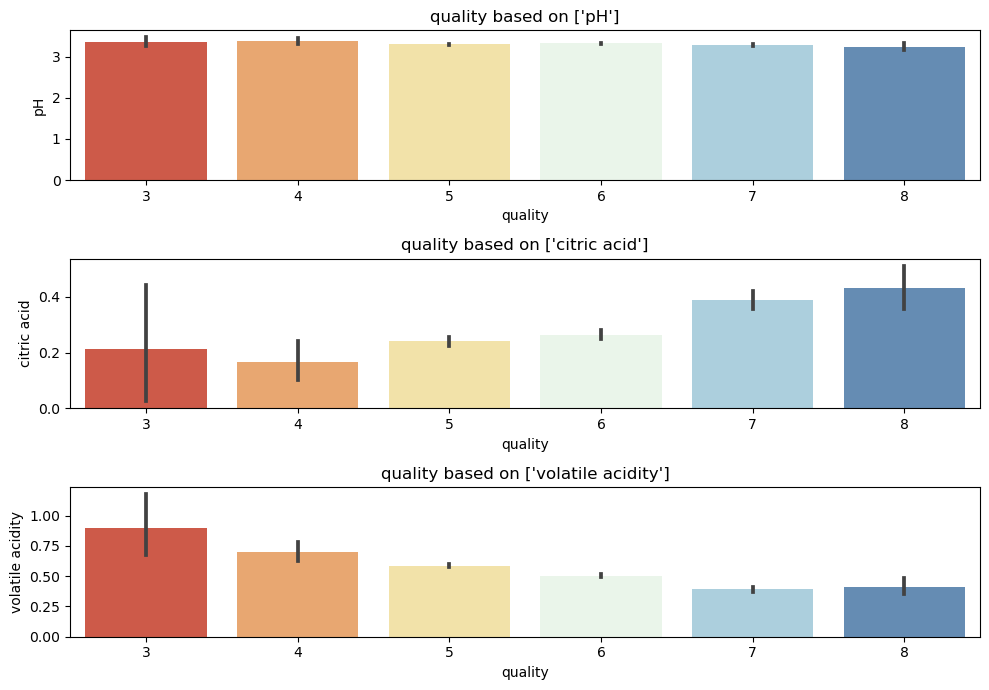

In [6]:
palette1 = sns.color_palette('RdYlBu')
def barplot (dataframe, y_plot):
    i = 0
    n = 1
    fig = plt.figure(figsize = (10,7))
    for i in y_plot:
        plt.subplot(len(y_plot),1,n)
        sns.barplot(data = dataframe, x = df['quality'], y = dataframe[i], palette=palette1).set(title = f'quality based on {[i]}')
        n += 1
    fig.tight_layout()
barplot(df, ['pH','citric acid', 'volatile acidity'])


From this 3 plots, we get:
1. <div align = 'justify'>pH (acidity level) is the fundamental element of the wine-making industry. There is plenty advantages of low pH to wine, such as inhibits bacteria and makes malolactic fermentation easier to control. From the first barplot, pH of both quality of wine not significantly different.</div>
2. <div align = 'justify'>Citric acid is added to wines to increase acidity, complement of certain flavor, or give a *fresh* flavor. Unfortunately, this kind of acid make unwanted microbes grow. In the second bar plot, high quality wine (more than 6) contains about 0.4 g/L citric acid in average, makes them the highest compare to  the low one (less than or equal to 6).</div>
3. <div align = 'justify'> Volatile (gaseous) acidity is a measure to wine's volatile acids. One of the primary components of this acidity is *acetic acid*. This acid is also owned by a vinegar. Volatile acidity of the high-quality wines are the lowest compared to the low quality ones. It means that low quality wine's odor more like a vinegar.</div>



Additional Ref:
* Bartowsky, E.J., Henschke, P.A., “The ‘buttery’ attribute of wine-diacetyl-desirability, spoilage and beyond. 2004. Int. J. of Food Microbiology 96: 235-255.
* Boulton, R.B., Singleton,. V., Bisson, L., and Kunkee, R., Principles and Practices of Winemaking. 1996 Chapman & Hall, New York.
* Boulton, R.B.; Singleton, V.L.; Bisson, L.F.; Kunkee, R.E. 1996. Juice and wine acidity Principles and practices of winemaking. New York: Chapman & Hall: 521–253.
* Coulter, A.D.; Godden, P.W.; Pretorius, I.S. 2004. Succinic acid—How it is formed, what is its effect on titratable acidity, and what factors influence its concentration in wine? Aust. N.Z. Wine Ind. J. 19(6): 16–20, 22–25.
* Gardner, Denise. M. Volatile Acidity in Wine. 2022. https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20(VA)%20is%20a%20measure%20of%20the%20wine's%20volatile,smell%20and%20taste%20of%20vinegar.
* Lui, S. Q. Malolactic fermentation in wine – beyond deacidification.  2001. Journal of Applied Microbiology 2002, 92, 589–601.
* Sharma, R.K. Citric Acid. CRC Press LLC. 2000.

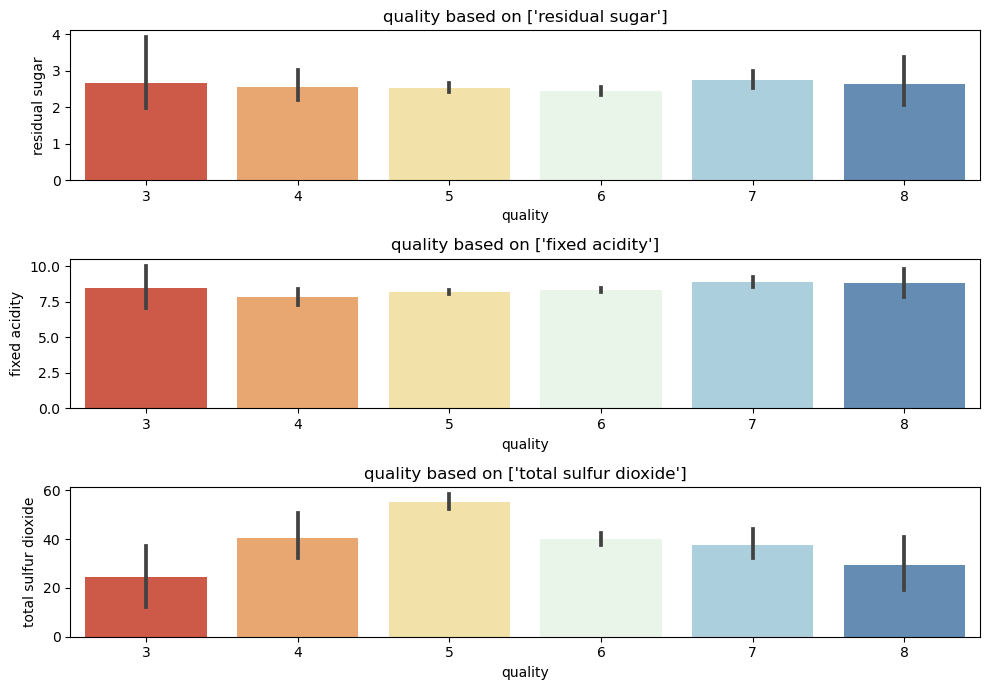

In [7]:
barplot(df, ['residual sugar', 'fixed acidity', 'total sulfur dioxide'])

This plots make us conclude:
1. <div align = 'justify'> Wine not only contain acid, but also sugar. *Residual* *sugar* refers to sugar left in wine after fermentation. The average value of sugar left in high quality wine is higher than low one, which means that high quality wine is giving more sweet taste than low quality. </div>
2. <div align = 'justify'> The fixed acidities found in wines are tartaric, malic, citric, and succinic. All of these acids originated in grapes with exception of succinic acid, which is produced by yeast (ragi) during the fermentation process. The 2nd bar plot shows fixed acidity of low quality and the high quality wines. Unfortunately, there is no significant difference between these wines. </div>
3. <div align = 'justify'> Wine also contain sulfur dioxide. Sulfur dioxide ($SO2$) is a preservative of wine to against bacteria and as an antioxidant. We see at the third bar graph that sulfur dioxide of  5th quality of wine is the highest than any quality and 3rd quality of wine is  the opposite.</div>

Additional Ref:
* Puckette, Madeline. What is Residual Sugar in Wine?. 2020.  https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* Howard, Cathy. What is Residual Sugar in Wine?. 2015. https://whicherridge.com.au/blog/what-is-residual-sugar-in-wine/#:~:text=The%20residual%20sugar%20remaining%20in,0.3%20to%202%20g%2FL.
* Nierman, Doug. Acidity is a fundamental property of wine, imparting sourness and resistance to microbial infection. 2004. https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=The%20predominant%20fixed%20acids%20found,2%2C000%20mg%2FL%20succinic%20acid.
* Iland, Patrick. Monitoring the Winemaking Process from Grapes to Wine: Techniques and Concepts. 2014 
* Jacobson, Jeal. N, Introduction to Wine Laboratory and Procedures.2016. ISBN:0-387-24377-1

In [8]:
palette2 = sns.color_palette('RdGy')
def densityplot(dataframe, x_plot, y_plot):
    i = 0
    n = 1
    fig = plt.figure(figsize = (9,8))
    for i in x_plot:
        plt.subplot(len(x_plot),1, n)
        sns.kdeplot(data = dataframe, x = dataframe[i], y = y_plot, color='green', palette=palette2, fill = True, log_scale=False)
        n += 1
    fig.tight_layout()

In [9]:
def scatter(dataframe, var_x, var_y, differentiate):
    n = 1
    i = 0
    for i in var_y:
        plt.subplot(len(var_y), 1, n)
        sns.scatterplot(data = dataframe, x= var_x, y = var_y[i], hue=differentiate)
        n += 1
    fig.tight_layout()    

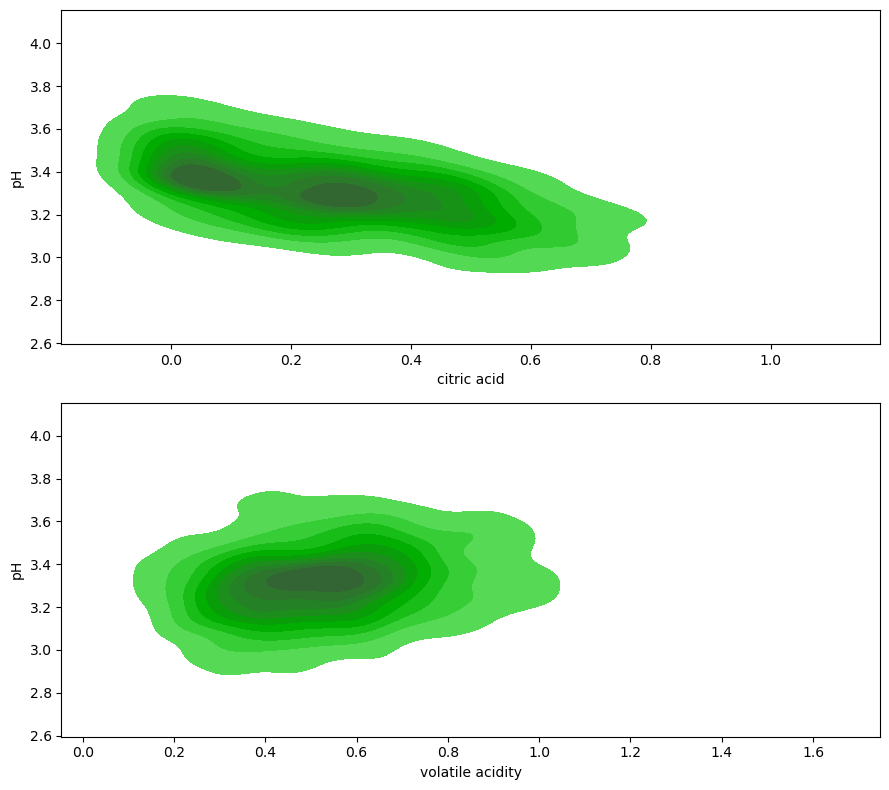

In [10]:
densityplot(df, ['citric acid', 'volatile acidity'], 'pH')

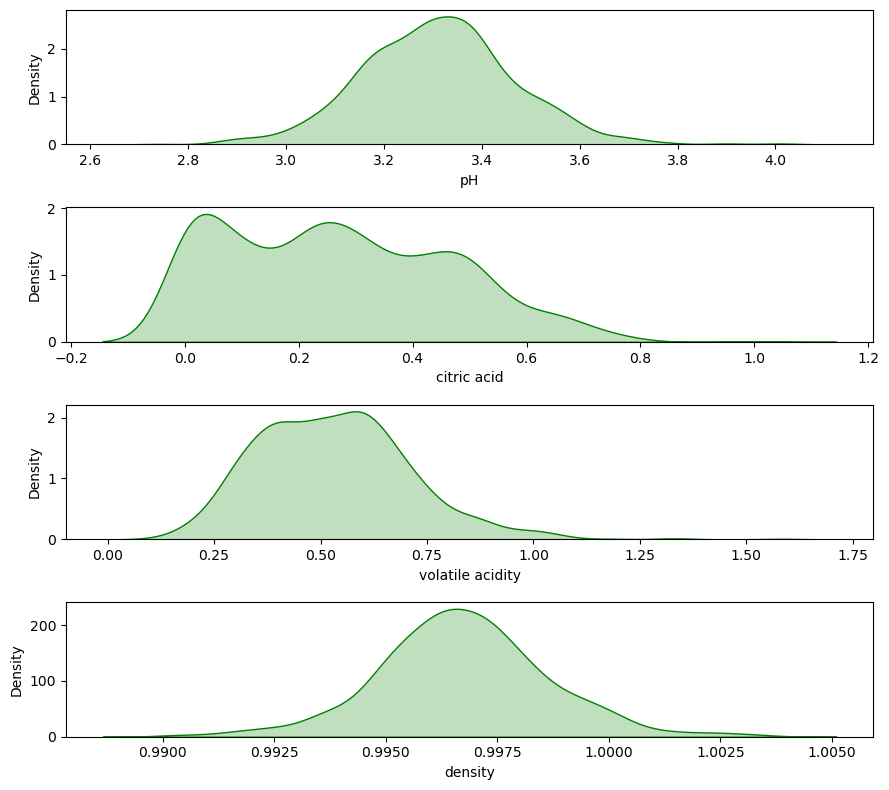

In [11]:
densityplot(df, ['pH','citric acid', 'volatile acidity', 'density'], None)

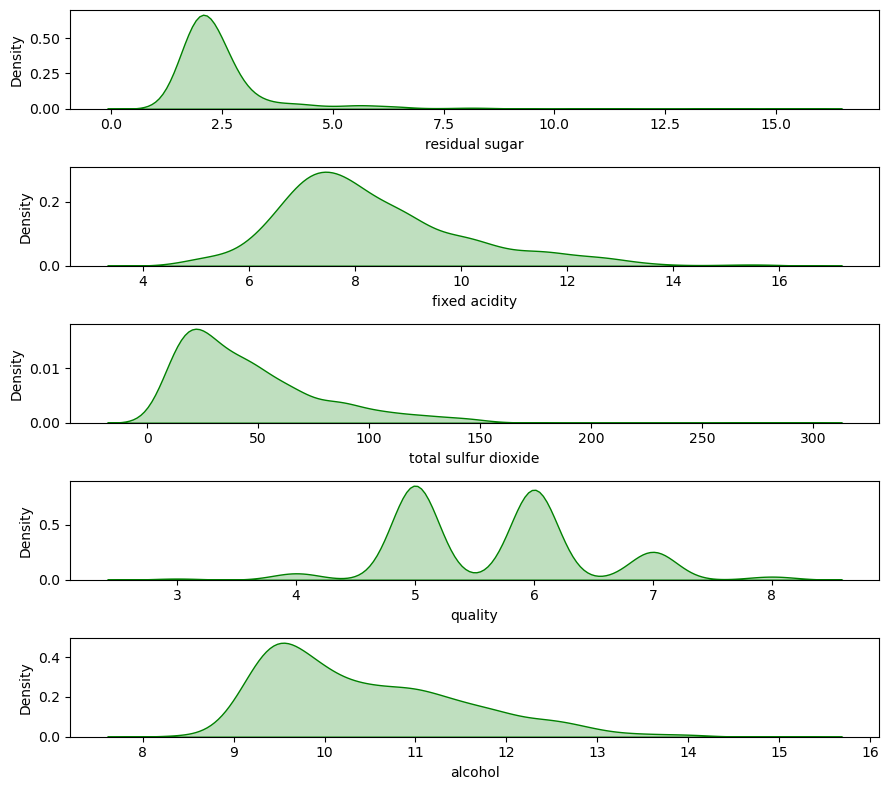

In [12]:
densityplot(df, ['residual sugar', 'fixed acidity', 'total sulfur dioxide', 'quality', 'alcohol'], None)

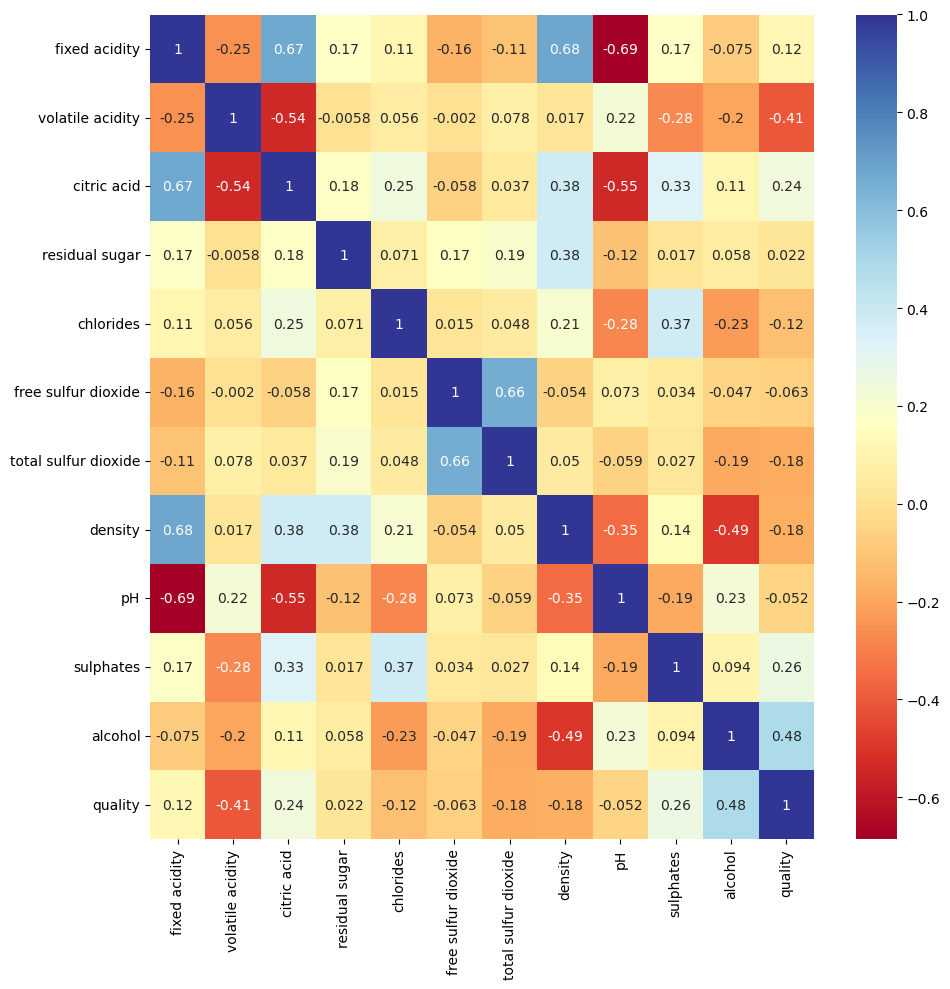

In [38]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data = df.drop('Id', axis =1).corr(), cmap = 'RdYlBu', annot=True)
fig.tight_layout()

<div align = 'justify'> Our label (target) is quality, so we focus what feature that have strongest (highest) correlation with the label. Volatile acidity and alcohol had the strongest correlation with the label.</div>

In [47]:
from scipy import stats
def corr_pval(dataframe, x_, y_):
    corr, p = stats.pearsonr(x = dataframe[x_], y = dataframe[y_])
    print_corr = print('Correlation value:', corr)
    print_p= print('P-value:', round(p,5))
    return print_corr, print_p

In [48]:
corr_pval(df, 'volatile acidity', 'quality')

Correlation value: -0.40739351292438586
P-value: 0.0


(None, None)

In [49]:
corr_pval(df, 'free sulfur dioxide', 'quality')

Correlation value: -0.06325964147253926
P-value: 0.03248


(None, None)

In [14]:
df2 = df.copy()
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [15]:
df2.drop('Id',  axis = 1, inplace = True)

In [16]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


___
## Modify data and performing Machine Learning model

In [17]:
from sklearn.preprocessing import LabelEncoder

bins = (2, 6.5, 8)
wine = ['bad', 'good']
df2['quality'] = pd.cut(df2['quality'], bins = bins, labels  = wine)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [18]:
encode = LabelEncoder()
df2['quality_code'] = encode.fit_transform(df2['quality'])

In [19]:
df2[['quality','quality_code']].value_counts()

quality  quality_code
bad      0               984
good     1               159
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

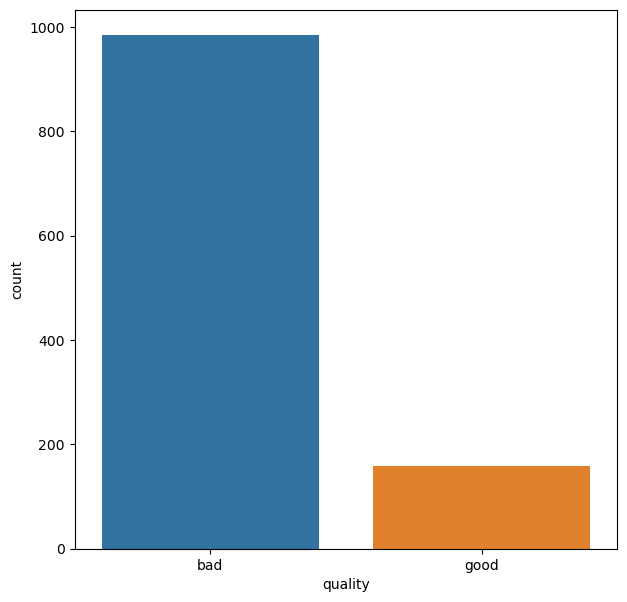

In [20]:
fig = plt.figure(figsize = (7,7))
sns.countplot(df2, x = df2['quality'])

In [21]:
# Seperate Dataset
X = df2.drop(['quality', 'quality_code'], axis = 1)
y = df2['quality_code']

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
print('X train')
print(X_train.shape)
print('X test')
print(X_test.shape)
print('y train')
print(y_train.shape)
print('y test')
print(y_test.shape)

X train
(857, 11)
X test
(286, 11)
y train
(857,)
y test
(286,)


### Random Forest Classifier Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trn_sc = sc.fit_transform(X_train)
X_tst_sc = sc.fit_transform(X_test)

In [24]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_trn_sc, y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
datatest = pd.DataFrame(rfc.predict(X_tst_sc), columns=['Data Predict'])
datatest.head()

,Data Predict
0,0
1,0
2,0
3,0
4,0


In [26]:
# Evaluate Random Forest Classifier Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def evaluation_score (test_var, prediction = rfc.predict(X_tst_sc)):
    rfc_acc = accuracy_score(test_var, prediction)
    conf_mat = confusion_matrix(test_var, prediction)
    plt.figure(figsize = (4,4))
    sns.heatmap(conf_mat, annot = True)
    print(f'accuracy score of Random Forest Classifier model is {rfc_acc}')
    print(classification_report(test_var, prediction))

accuracy score of Random Forest Classifier model is 0.8811188811188811
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       249
           1       0.57      0.32      0.41        37

    accuracy                           0.88       286
   macro avg       0.74      0.64      0.67       286
weighted avg       0.86      0.88      0.87       286



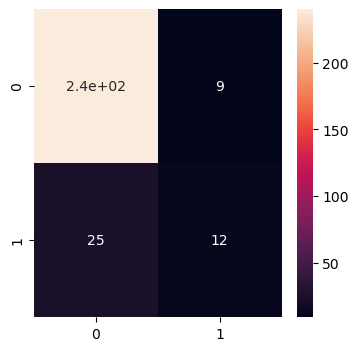

In [27]:
evaluation_score(y_test)

### Stochastic Gradient Descent

In [28]:
from sklearn.linear_model import SGDClassifier 
sgd = SGDClassifier(penalty=None, loss = 'log_loss')
sgd.fit(X_trn_sc, y_train)
sgd_data = pd.DataFrame({'SGDClassifier Predict':sgd.predict(X_tst_sc)})
sgd_data.head()
print(classification_report(y_test, sgd.predict(X_tst_sc)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       249
           1       0.33      0.51      0.40        37

    accuracy                           0.80       286
   macro avg       0.63      0.68      0.64       286
weighted avg       0.85      0.80      0.82       286



In [29]:
params = {
    'loss' : ['log_loss', 'hinge'],
    'max_iter' : [10,100,1000,10000,100000]
}
grid_sgd = GridSearchCV(sgd, param_grid = params, scoring='accuracy', cv = 5)

In [30]:
grid_sgd.fit(X_trn_sc, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(loss='log_loss', penalty=None),
             param_grid={'loss': ['log_loss', 'hinge'],
                         'max_iter': [10, 100, 1000, 10000, 100000]},
             scoring='accuracy')

In [31]:
grid_sgd.best_params_

{'loss': 'log_loss', 'max_iter': 100}

<Axes: >

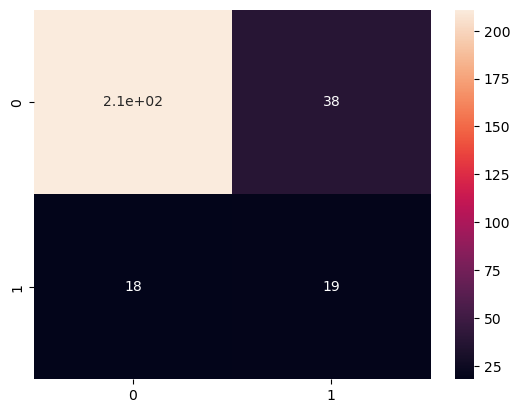

In [32]:
sns.heatmap(confusion_matrix(y_test, sgd.predict(X_tst_sc)), annot=True)

### Support Vector Classifier

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_trn_sc,  y_train)
svc_data = pd.DataFrame({'Support Vector Classifier Prediction':svc.predict(X_tst_sc)})
svc_data.head()

,Support Vector Classifier Prediction
0,0
1,0
2,0
3,0
4,0


In [34]:
print(classification_report(y_test, svc.predict(X_tst_sc)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       249
           1       0.71      0.32      0.44        37

    accuracy                           0.90       286
   macro avg       0.81      0.65      0.69       286
weighted avg       0.88      0.90      0.88       286



<Axes: >

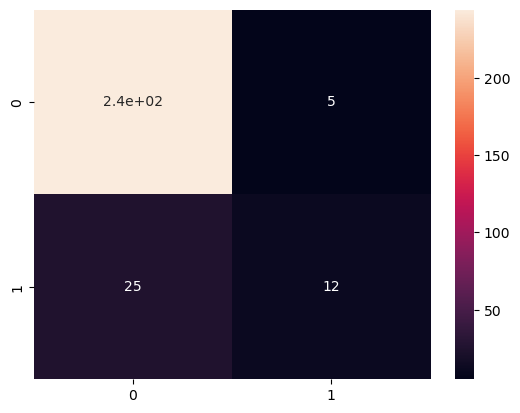

In [33]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_tst_sc)), annot = True)

___
## Improve Accuracy Model

### Grid Search CV

In [34]:
from sklearn.model_selection import GridSearchCV
param ={
    'C':[0.01,0.1,0.8,0.9,1.1,1.2,1.3,1.4],
    'kernel' : ['linear', 'rbf'],
    'gamma': [0.01,0.1,0.8, 0.9, 1.1,1.2,1.3,1.4]
}
grid_svc= GridSearchCV(svc, param_grid = param, scoring='accuracy', cv = 5)

In [35]:
grid_svc.fit(X_trn_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.01, 0.1, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [36]:
# Best parameter in our SVC model
grid_svc.best_params_

{'C': 1.3, 'gamma': 1.1, 'kernel': 'rbf'}

In [37]:
# Best index in train dataset
grid_svc.best_index_

105

In [38]:
# Try SVC model by using best parameter
svc2 = SVC(C=1.3, gamma=1.1, kernel = 'rbf')
svc2.fit(X_trn_sc, y_train)
svc2_data = pd.DataFrame({'SVC Prediction':svc2.predict(X_tst_sc)})
print(classification_report(y_test, svc2.predict(X_tst_sc)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       249
           1       0.88      0.41      0.56        37

    accuracy                           0.92       286
   macro avg       0.90      0.70      0.75       286
weighted avg       0.91      0.92      0.90       286



### Cross Validation Score for Random Forest and SGD

In [39]:
rfc_eval = cross_val_score(estimator=rfc, X = X_trn_sc, y = y_train, cv = 5)
rfc_eval.mean()

0.9066367469060248

In [40]:
rfc_eval

array([0.91860465, 0.90697674, 0.92982456, 0.92982456, 0.84795322])

In [41]:
sgd_eval = cross_val_score(estimator=sgd, X = X_trn_sc, y = y_train, cv=5)
sgd_eval.mean()

0.8541751665986672

___
## Additional Page (Using Deep Learning)

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

X = df.drop('Id', axis = 1).copy()
y = X.pop('quality')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X.shape

(1143, 11)

In [54]:
df['quality'].head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

In [87]:
model = keras.Sequential(
    [layers.Dense(256, activation = 'sigmoid', input_shape =[11]),
     layers.Dropout(0.3),
     layers.BatchNormalization(),
     layers.Dense(256, activation = 'sigmoid'),
     layers.Dropout(0.3),
     layers.BatchNormalization(),
     layers.Dense(256, activation = 'sigmoid'),
     layers.Dropout(0.4),
     layers.BatchNormalization(),
     layers.Dense(1)])

In [88]:
model.compile(optimizer='adam', loss = 'MAE')

In [89]:
history = model.fit(x = X_train, y= y_train, batch_size= 512, epochs=40, validation_data=(X_test, y_test))

Epoch 1/40
2/2 [==============================] - 6s 317ms/step - loss: 1.1324 - val_loss: 0.2852
Epoch 2/40
2/2 [==============================] - 0s 57ms/step - loss: 1.1633 - val_loss: 0.2079
Epoch 3/40
2/2 [==============================] - 0s 63ms/step - loss: 1.1394 - val_loss: 0.1839
Epoch 4/40
2/2 [==============================] - 0s 61ms/step - loss: 1.1021 - val_loss: 0.1669
Epoch 5/40
2/2 [==============================] - 0s 67ms/step - loss: 1.0787 - val_loss: 0.1557
Epoch 6/40
2/2 [==============================] - 0s 66ms/step - loss: 1.0726 - val_loss: 0.1529
Epoch 7/40
2/2 [==============================] - 0s 55ms/step - loss: 1.0467 - val_loss: 0.1611
Epoch 8/40
2/2 [==============================] - 0s 65ms/step - loss: 0.9983 - val_loss: 0.1692
Epoch 9/40
2/2 [==============================] - 0s 61ms/step - loss: 0.9370 - val_loss: 0.1746
Epoch 10/40
2/2 [==============================] - 0s 58ms/step - loss: 1.0248 - val_loss: 0.1808
Epoch 11/40
2/2 [===========

In [90]:
hist = pd.DataFrame(history.history)
hist

,loss,val_loss
0,1.132415,0.285204
1,1.163341,0.207877
2,1.139351,0.183869
3,1.102139,0.166882
4,1.078673,0.155684
5,1.072593,0.152919
6,1.046744,0.161114
7,0.998344,0.169157
8,0.936958,0.174593
9,1.024815,0.180836


Minimum val loss: 0.1529


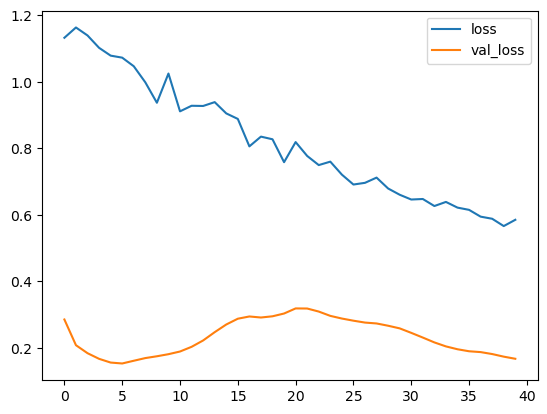

In [91]:
hist.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum val loss: {:0.4f}".format(hist['val_loss'].min()))

<Axes: >

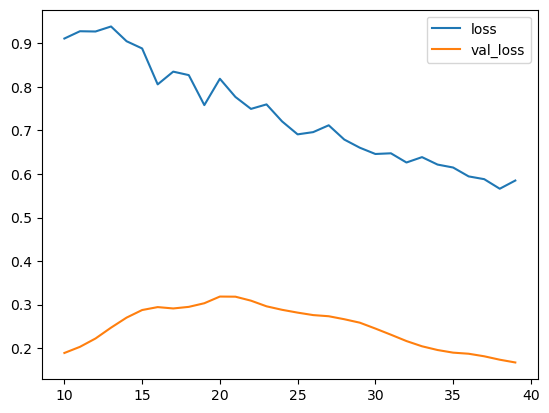

In [92]:
hist.loc[10:, ['loss','val_loss']].plot()

Source
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [74]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               3072      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                      